# Data Preprocessing

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
# instead of skimage <--> opencv can also used here
from skimage.io import imread
from skimage.transform import resize

In [2]:
a = np.array([[1,2,3,4,5],
              [6,7,8,9,2]])
print(a.ndim)

2


In [3]:
# How to convert matrix to vectors -> using flatten()
# while giving image as a input we need to flatten it.
a.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 2])

## Image preprocessing steps

    -> Resize
    
    -> Flatten

In [4]:
target = []
images = []
flat_data = []

Data_Dir = 'images'
Categories = ['pretty red rose', 'rugby ball leather', 'ice cream cone']

for category in Categories:
    class_num = Categories.index(category) # Label encoding the values
    path = os.path.join(Data_Dir, category) # Creating path to use all type of images in Data_Dir folder.
    for img in os.listdir(path):
        # img_path = os.path.join(path, img) # all images path
        img_array = imread(os.path.join(path, img))
        # print(img_array) # printing the array of the image
        # plt.imshow(img_array) # diplaying the image
        img_resized = resize(img_array, (224,224,3)) # resizing the images
        flat_data.append(img_resized.flatten()) # flattening and appending the resized images
        images.append(img_resized)
        target.append(class_num)
        
# converting into numpy array
flat_data = np.array(flat_data)
images = np.array(images)
target = np.array(target)

In [5]:
flat_data

array([[0.37603203, 0.32801428, 0.0449662 , ..., 0.0021238 , 0.00980206,
        0.00212358],
       [0.60324991, 0.4894239 , 0.41805488, ..., 1.        , 1.        ,
        1.        ],
       [0.06693388, 0.00889595, 0.0210106 , ..., 0.98958164, 0.01036592,
        0.03762806],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [6]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<BarContainer object of 3 artists>

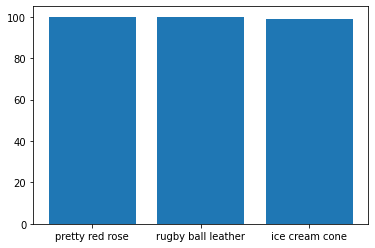

In [7]:
unique, counts = np.unique(target, return_counts= True)
plt.bar(Categories, counts)

# Splitting data into train and test

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size = 0.3, random_state = 42)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [10]:
param_grid = [
    {'C' : [1, 10, 100, 1000], "kernel" : ['linear']},
    {'C' : [1, 10, 100, 1000], "gamma" : [0.001, 0.0001],"kernel" : ['rbf']}
]

In [11]:
svc = svm.SVC(probability = True)
model = GridSearchCV(svc, param_grid)
model.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
accuracy_score(y_pred, y_test)

0.9111111111111111

In [15]:
confusion_matrix(y_pred, y_test)

array([[32,  3,  0],
       [ 1, 27,  1],
       [ 2,  1, 23]], dtype=int64)

# Saving the model using pickle library

In [16]:
import pickle
pickle.dump(model, open('img_model.pkl','wb'))

In [17]:
image_model = pickle.load(open('img_model.pkl','rb'))

enter the image url: https://5.imimg.com/data5/DU/JK/MY-51695609/leather-rugby-balls-500x500.jpg
(500, 500, 3)
Predicted image is: rugby ball leather


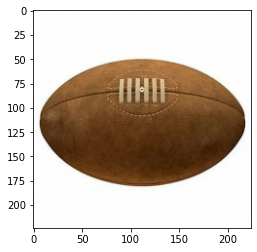

In [18]:
# Testing with new image

flatten_data = []
url = input('enter the image url: ')
image = imread(url)
image_resize = resize(image, (224,224,3))
flatten_data.append(image_resize.flatten())
flatten_data = np.array(flatten_data)
print(image.shape)
plt.imshow(image_resize)
output = image_model.predict(flatten_data)
y_output = Categories[output[0]]
print(f'Predicted image is: {y_output}')

In [19]:
# youtube link -> https://youtu.be/dw96S_iFFbI